<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>
<center>ML2: Drug Prediction - Classification</center>
<center>By : Mahesh Ambokar - Jan 2021 Cohort</center>

# Project Description

## Company Introduction 

The client for this project is a pharmaceutical company. 

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection. 

Their research and development team have recently developed five types of drugs to fight against chronic throat infection. 

They want to quickly release the drug in the market so that they could cure people and increase revenue for the company. 

Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health. 

The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team. 

 
 

## Current Scenario 

The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market. 

The current process suffers from the following problems: 

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects. 

Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team. 

This process is time-consuming and wastage of resources. 

 
 

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report. 

## My Role 

Given a dataset containing the health report of the people from the test group. 

The main task is to build a multi-class classification model using the dataset. 

Because there was no machine learning model for this problem in the company, we don’t have a quantifiable win condition. 

Need to build the best possible model. 

 

## Project Deliverables 

Deliverable: Drug classification. 

Machine Learning Task: Multi-class classification 

Target Variable: Drug 

Win Condition: N/A (best possible model) 

 
 

## Evaluation Metric 

The model evaluation will be based on the Accuracy Score. 

To learn about F1 Score’s Python implementation, please visit this link. 

 

## 1.Data Acquisition & Description

### The dataset is divided into two parts: Train, and Test sets. 

#### Train Set: 

    The train set contains 160 rows and 7 columns. 

    The last column Drug is the target variable. 

 
 

#### Test Set: 

    The test set contains 40 rows and 6 columns. 

    The test set doesn’t contain the Drug column. 

    It needs to be predicted for the test set. 

## Dataset Feature Description 

### The Dataset contains the following columns: 
 1. Id  : Unique Id of the sample 
 2. Age : Age of the person 
 3. Sex : The sex of the person(M and F) 
 4. BP  : Blood pressure of the person
 5. Cholestrol: The level of cholesterol in a person's body
 6. Na_to_k : Sodium and potassium ratio 
 7. Drug : Contains 5 classes of drugs as(drug A , drug B, drug C, drug X, drug Y)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")    

In [3]:
df_drug = pd.read_csv("drug_train.csv")

In [4]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [5]:
duplicate = df_drug[df_drug.duplicated()]
display(duplicate)

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [6]:
df_drug.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.84000,drugX
1,197,52,M,NORMAL,HIGH,9.89400,drugX
2,38,39,F,NORMAL,NORMAL,9.70900,drugX
3,24,33,F,LOW,HIGH,33.48600,DrugY
4,122,34,M,NORMAL,HIGH,22.45600,DrugY


In [7]:
# df_drug.describe()
df_drug[df_drug['Drug']=='DrugY'].describe()

,Id,Age,Na_to_K
count,76.00000,76.00000,76.00000
mean,95.80263,45.50000,22.14170
std,60.64784,16.77021,6.19663
min,0.00000,15.00000,15.01500
25%,41.50000,31.75000,17.01425
50%,93.00000,44.00000,19.90450
75%,145.75000,60.25000,25.89900
max,194.00000,74.00000,38.24700


### Primary Data description observations

    1.Numbers of features in Dataset : 7
    2.Numeric Features : Id , Age, Na_to_K 
    3.Categorical Features : Sex,BP,Cholesterol,Drug
    4.Target Ctegorical Variable:Drug
    5.No Missing values in 169 rows.

## 2. EDA

###  Target Variable : Univariate Analysis

In [8]:
def plotSNSCountWithPerc(df,colname):
    total = float(len(df))
    ax = sns.countplot(df[colname])
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width()/2)
        y = p.get_height() +1
        ax.annotate(percentage, (x, y),ha='center')

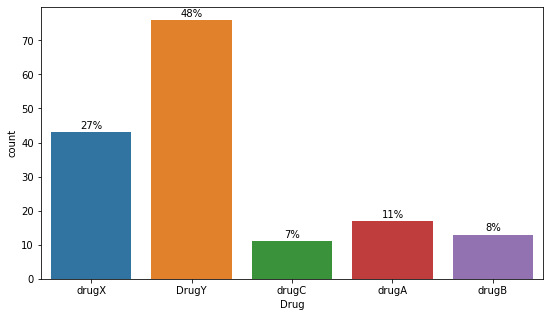

In [9]:
plt.figure(figsize=(9,5))
plotSNSCountWithPerc(df_drug,"Drug")
plt.show()

1. Majority Classes are : drugX,DrugY. They reperesents 75% of sample dataset.


2. Minority Classes are : drucC,drugA,drugB they constituents 25% of sample dataset.


3. As ratio of Minority to Majority classes is 25% / 75% ~ 1/3  , we can say samples are slightly inbalanced but not extreme.


4. So inbalance techniques are not needed right now.


5. Depends on accuracy and F1 score we can decide for blancing teechinique in future.



### 2.1 Explainatory Continuous Variable : Univariate Analysis

In [10]:
df_drug.describe()

,Id,Age,Na_to_K
count,160.00000,160.00000,160.00000
mean,99.07500,45.38750,16.19499
std,59.37489,16.10148,7.25469
min,0.00000,15.00000,6.26900
25%,45.50000,32.00000,10.44525
50%,100.50000,46.00000,14.07650
75%,149.50000,58.25000,19.48075
max,199.00000,74.00000,38.24700


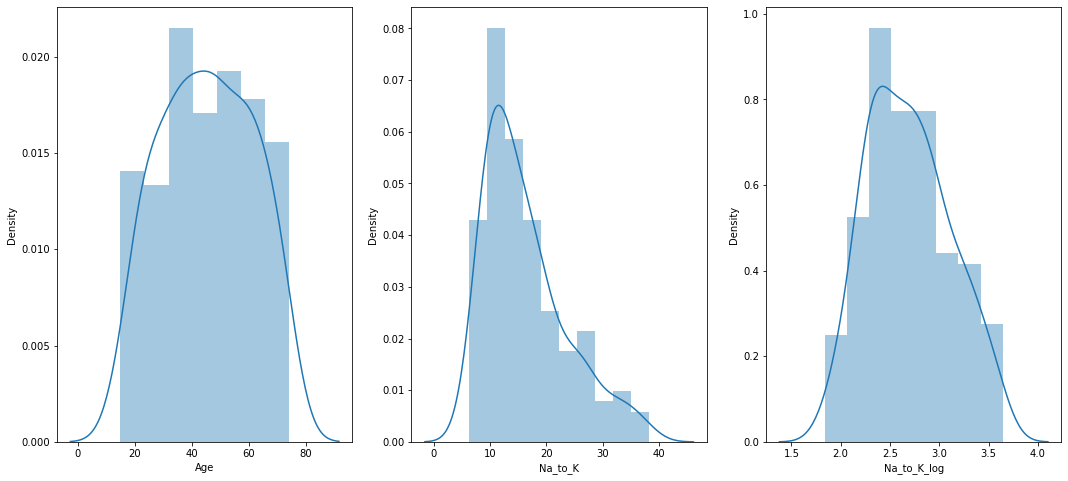

In [11]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.distplot(df_drug["Age"])
df_drug["Na_to_K_log"] = np.log(df_drug["Na_to_K"])

plt.subplot(1,3,2)
sns.distplot(df_drug["Na_to_K"])

plt.subplot(1,3,3)
sns.distplot(df_drug["Na_to_K_log"])

plt.show()

In [12]:
# print(df_drug[plt.figure(figsize=(10,20))
df_drug["Na_to_K_log"].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count   160.00000
mean      2.69407
std       0.42111
min       1.83562
25%       2.34615
50%       2.64450
75%       2.96941
85%       3.23321
90%       3.28416
100%      3.64407
max       3.64407
Name: Na_to_K_log, dtype: float64

 1. Age Data is normally distributed as mean(45.38750) is closer to median(46)
 
 
 2. Na_to_K : Mean (16.19499) is greter than median(14.07), hence right skewed or positively skewed.
 
 
 3. Na_to_k_log : created new feature to see if log transformation of Na_to_k brings mean closer tom median and it does and transformed feture of Na_to_K seems to be evenly nomrally distributed.
 

### 2.2 Explainatory Continuous Variable : Bi-variate Analysis

<Figure size 1080x864 with 0 Axes>

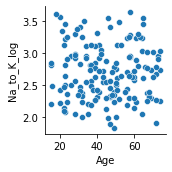

In [13]:
plt.figure(figsize=(15,12))
sns.pairplot(data=df_drug,x_vars=['Age'],y_vars=['Na_to_K_log'])
plt.tight_layout()
plt.show()

In [14]:
df_drug.corr()

,Id,Age,Na_to_K,Na_to_K_log
Id,1.00000,0.02532,-0.02332,-0.04201
Age,0.02532,1.00000,-0.04236,-0.02121
Na_to_K,-0.02332,-0.04236,1.00000,0.97432
Na_to_K_log,-0.04201,-0.02121,0.97432,1.00000


1. From above pair plot and corr function result data we can conclude that there is no co-relation between Age and Na_to_K or Age and Na_to_K_log

### 2.2 Explainatory Categorical Univariate Analysis

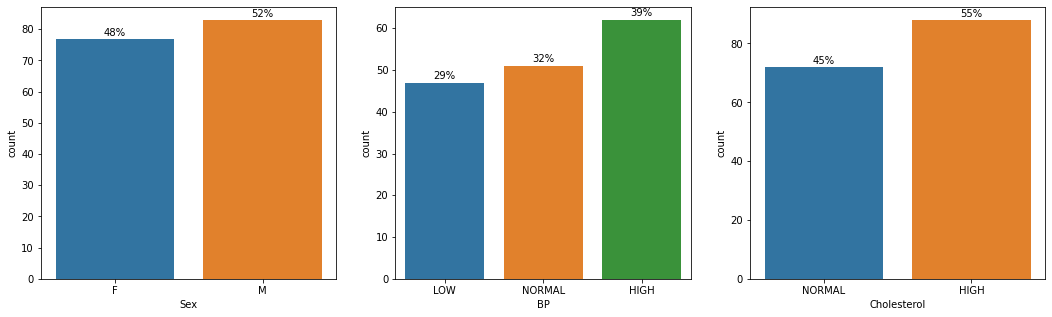

In [15]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
#sns.countplot(df_drug["Sex"])
plotSNSCountWithPerc(df_drug,"Sex")
    

plt.subplot(1,3,2)
# sns.countplot(df_drug["BP"])
plotSNSCountWithPerc(df_drug,"BP")

plt.subplot(1,3,3)
#sns.countplot(df_drug["Cholesterol"])
plotSNSCountWithPerc(df_drug,"Cholesterol")

plt.show()

1. Sex,BP & Cholesterol : Data is mostly Balanced

### 2.3 Explainatory Variable Bivariate Analysis

<Figure size 720x720 with 0 Axes>

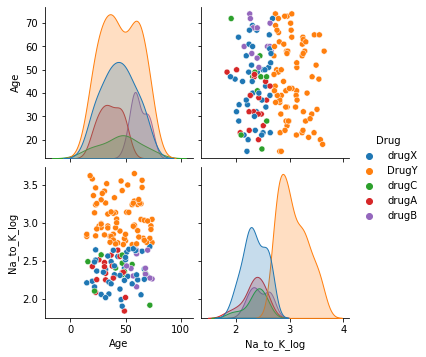

In [16]:
plt.figure(figsize=(10,10))

sns.pairplot(df_drug.loc[:,df_drug.columns[df_drug.columns !='Id'] & \
                         df_drug.columns[df_drug.columns !='Na_to_K']],hue='Drug')
plt.show()

1. When Na_to_K is moderate(near mean,20) to high DrugY is prescribed . While it is below mean other drugs mostly drugX,A,C,B is prescribed across all age spectrum(range)

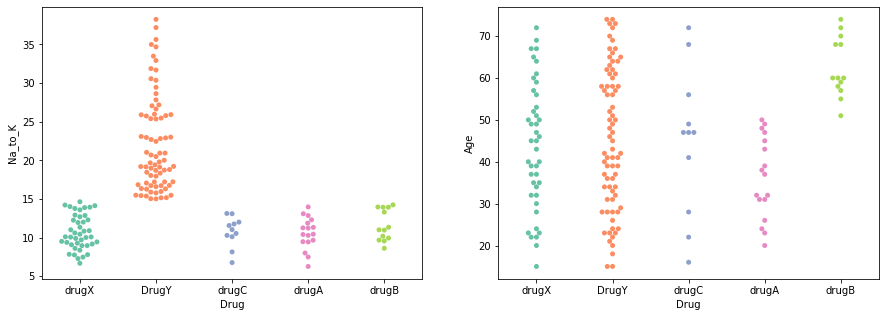

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.swarmplot(x='Drug',y='Na_to_K', data=df_drug ,palette = 'Set2')

plt.subplot(1,2,2)
sns.swarmplot(x='Drug',y='Age', data=df_drug ,palette = 'Set2')
plt.show()

1. "drugY" is assigned for patients with high Na_to_K values

2. "druA" is assigned to age below 50 years

3. "drugB" is assigned to patient above 50 years

<Figure size 1080x360 with 0 Axes>

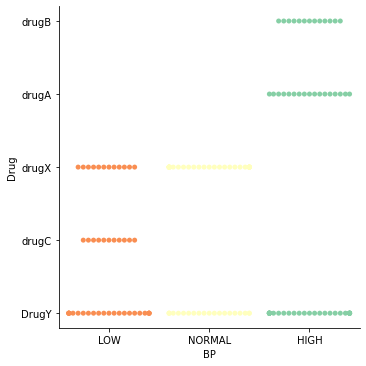

In [18]:
plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
sns.catplot(x = 'BP' , y = 'Drug' , data = df_drug , kind="swarm" , palette ='Spectral')
plt.show()

1. "drugB","drugA" & "drugY" is prescribed to HIGH BP patients


2. "drugX" & "drugY" is prescribed to NORMAL BP patients


3. "drugX", "drugC" & "drugY" is prescribed to LOW BP patients




<Figure size 1080x360 with 0 Axes>

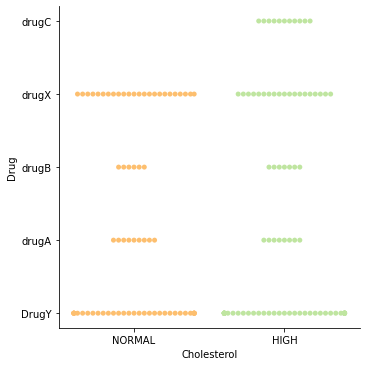

In [19]:
plt.figure(figsize=(15,5))

sns.catplot(x = 'Cholesterol' , y = 'Drug' , data = df_drug , kind="swarm" , palette ='Spectral')
plt.show()

1. "drugX", "drugB","drugA" & "drugY" is prescribed to NORMAL Cholesterol Patient


2. "drugX", "drugB","drugA","drugY" & "drugC" is prescribed to HIGH Cholesterol Patient

## 3. Data Preprocessing

In [20]:

# This generalised function to Fit and transform given feature with given dataset to label encode
# this will return label encoded dataset along 
# with label classes and encoder object (This may be use to only transform another dataset say test )

from sklearn.preprocessing import LabelEncoder
def LE_FitTransform(featurename:str,dataset:pd)-> [pd,str,LabelEncoder]:
    
    from sklearn.preprocessing import LabelEncoder
     
    
    X = dataset.copy()
    
    #Step 1: Make list of input Feature name list along with its Label Category Column Name
    cat_col = [featurename] # 'BP'/'Cholesterol'/'Sex'
    cat_col_lbltr = cat_col[0] + '_LABEL_ENCODE'
    
    # Step2: Make Dtaframe from input dataframe assume passed feature is present in passed dataframe
    X_cat_col = X[cat_col]
    #display(X_cat_col)
    
    # Step2:  creating instance of labelencoder
    labelencoder = LabelEncoder()
    
    #X_cat_col[cat_col_lbltr] = labelencoder.fit_transform(X_cat_col)
    labelencoder.fit(X_cat_col)
    X_cat_col[cat_col_lbltr] = labelencoder.transform(X_cat_col)
    # display(X_cat_col.head(10))
    # print(labelencoder.classes_)
    
    # Get distinct class labels in category column
    lbl_classes = labelencoder.classes_
    
    # this will Post fix column name with each class value e.g HIGH_BP/LOW_BP etc.
    string = '_' + cat_col[0] 
    lbl_classes_withcolname = list(map(lambda orig_string: orig_string + string, lbl_classes))

    
    
    X = X.join(X_cat_col[cat_col_lbltr])
    
    return [X,lbl_classes_withcolname,labelencoder]
  

In [21]:
# Label Encoding of Target variable 
temp = []
for i in df_drug.Drug:
    if i == 'drugX':
        temp.append(0)
    elif i =='DrugY':
      temp.append(1)
    elif i =='drugC':
      temp.append(2)
    elif i =='drugA':
      temp.append(3)
    elif i =='drugB':
      temp.append(4)
        
df_drug['Drug_LABEL_ENCODE'] = temp
#df_drug.drop(['Drug'],axis=1,inplace=True)
labelencoder_target = ['drugX','DrugY','drugC','drugA','drugB']

In [22]:
df_drug.head(15)

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_log,Drug_LABEL_ENCODE
0,79,32,F,LOW,NORMAL,10.84000,drugX,2.38324,0
1,197,52,M,NORMAL,HIGH,9.89400,drugX,2.29193,0
2,38,39,F,NORMAL,NORMAL,9.70900,drugX,2.27305,0
3,24,33,F,LOW,HIGH,33.48600,DrugY,3.51113,1
4,122,34,M,NORMAL,HIGH,22.45600,DrugY,3.11156,1
5,195,56,F,LOW,HIGH,11.56700,drugC,2.44816,2
6,29,45,M,LOW,HIGH,17.95100,DrugY,2.88765,1
7,19,32,F,HIGH,NORMAL,25.97400,DrugY,3.25710,1
8,143,74,M,HIGH,NORMAL,15.43600,DrugY,2.73670,1
9,86,51,F,NORMAL,HIGH,13.59700,drugX,2.60985,0


In [23]:
# Step 1: Create X & y variable dataset
# Na_to_K_log
 
X = df_drug.loc[:,df_drug.columns[df_drug.columns !='Id'] & \
                         df_drug.columns[df_drug.columns !='Na_to_K_log'] & \
               df_drug.columns[df_drug.columns !='Drug']]
y_raw = (df_drug.loc[:,df_drug.columns[df_drug.columns =='Drug_LABEL_ENCODE']])
#y_raw = (df_drug.loc[:,df_drug.columns[df_drug.columns =='Drug']])

In [24]:
display((X.head(3)))
display((y_raw.head(3)))
# display((y.head(3)))

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_LABEL_ENCODE
0,32,F,LOW,NORMAL,10.84000,0
1,52,M,NORMAL,HIGH,9.89400,0
2,39,F,NORMAL,NORMAL,9.70900,0


,Drug_LABEL_ENCODE
0,0
1,0
2,0


In [25]:
# Label Encoding of Target variable 
# Following line is commented as per feedback from INSAID 
# as they have fixed encoding for target given and it os applied in above code 

'''
colname = 'Drug'
y_int ,lbl_ec_feat_cls_target,labelencoder_target = \
                        LE_FitTransform(featurename= colname,dataset=y_raw)


y =  pd.DataFrame(y_int.pop("Drug_LABEL_ENCODE"))
display(y.head(3))
#print(lbl_ec_feat_cls_target)
print(labelencoder_target.classes_)
le_name_mapping = dict(zip(labelencoder_target.classes_, labelencoder_target.transform(labelencoder_target.classes_)))
print(le_name_mapping)
#labelencoder_target.

'''

y =  y_raw
display(y.head())

,Drug_LABEL_ENCODE
0,0
1,0
2,0
3,1
4,1


In [26]:
# Load submission test data . This will used in last step 
df_drug_prod = pd.read_csv("drug_test.csv")
df_drug_prod["Na_to_K_log"] = np.log(df_drug_prod["Na_to_K"])
df_drug_prod.head()


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_log
0,95,36,M,LOW,NORMAL,11.42400,2.43572
1,15,16,F,HIGH,NORMAL,15.51600,2.74187
2,30,18,F,NORMAL,NORMAL,8.75000,2.16905
3,158,59,F,LOW,HIGH,10.44400,2.34603
4,128,47,M,LOW,NORMAL,33.54200,3.51280


In [27]:

X_Prod = df_drug_prod[['Age','Sex','BP','Cholesterol','Na_to_K']]
# & df_drug.columns[df_drug.columns !='Drug']

In [28]:
#X.head()
X_Prod.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,36,M,LOW,NORMAL,11.42400
1,16,F,HIGH,NORMAL,15.51600
2,18,F,NORMAL,NORMAL,8.75000
3,59,F,LOW,HIGH,10.44400
4,47,M,LOW,NORMAL,33.54200


In [29]:
print(X_Prod.columns)
print(X.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug_LABEL_ENCODE'], dtype='object')


In [30]:
# This generalised function to only transform given feature with given dataset 
# This will label encode given dataset (say train) and return encoder object and encoded data as well.
# This Encoded object can be used to transform another dataset say test 

from sklearn.preprocessing import LabelEncoder
def LE_Transform(featurename:str,dataset:pd,labelencoder:LabelEncoder)-> [pd,str]:
    
    from sklearn.preprocessing import LabelEncoder
     
    
    X = dataset.copy()
    
    #Step 1: Make list of input Feature name list along with its Label Category Column Name
    cat_col = [featurename] # 'BP'/'Cholesterol'/'Sex'
    cat_col_lbltr = cat_col[0] + '_LABEL_ENCODE'
    
    # Step2: Make Dtaframe from input dataframe assume passed feature is present in passed dataframe
    X_cat_col = X[cat_col]
    #display(X_cat_col)
    
    # Step2:  creating instance of labelencoder
    #labelencoder = LabelEncoder()
    
    #X_cat_col[cat_col_lbltr] = labelencoder.fit_transform(X_cat_col)
    X_cat_col[cat_col_lbltr] = labelencoder.transform(X_cat_col)
    
    
    # display(X_cat_col.head(10))
    # print(labelencoder.classes_)
    
    # Get distinct class labels in category column
    lbl_classes = labelencoder.classes_
    
    # this will Post fix column name with each class value e.g HIGH_BP/LOW_BP etc.
    string = '_' + cat_col[0] 
    lbl_classes_withcolname = list(map(lambda orig_string: orig_string + string, lbl_classes))

    
    
    X = X.join(X_cat_col[cat_col_lbltr])
    
    return [X,lbl_classes_withcolname]

In [31]:
l1 = ['F_Sex','M_Sex']
l2= l1[1:]
l2

['M_Sex']

In [32]:
 # Note : 
    #      OneHotEncoder from SciKit library only takes numerical categorical values
    #      Hence any value of string type should be label encoded before one hot encoded
    # Reference:
    

# This generalised function to Fit and transform given feature with given dataset 
# This will One hot encode given dataset (say train) and return one hot encoder object and encoded data as well.
# This Encoded object can be used to transform another dataset say test 
# This is for Train Dataset 
from sklearn.preprocessing import OneHotEncoder
def OHE_FitTransform(featurename:str,lbl_ec_dataset:pd,label_encoded_feature_classes:[])-> [pd,OneHotEncoder]:
    
    #from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder
    
    X = lbl_ec_dataset.copy()

    col_list = [featurename] #['BP','Cholesterol','Sex']
    for col in col_list:
        cat_col = [col] # BP
        cat_col_lbltr = cat_col[0] + '_LABEL_ENCODE'

        #X_cat_col = pd.DataFrame(X[[cat_col[0],cat_col_lbltr]])
        X_cat_col = pd.DataFrame(X[cat_col_lbltr])

        # creating instance of one-hot-encoder
        enc = OneHotEncoder(handle_unknown='error',drop='first') # ignore

        #enc_df = pd.DataFrame(enc.fit_transform(X_cat_col[[cat_col_lbltr]]).toarray())
        enc.fit(X_cat_col[[cat_col_lbltr]])

        enc_df = pd.DataFrame(enc.transform(X_cat_col[[cat_col_lbltr]]).toarray())
        
        # One-hot encoding removed index; put it back
        enc_df.index = X_cat_col.index

        # Stores list of newly formed features
        cat_labels_new = list(enc.get_feature_names())

        enc_cols = enc_df.columns.to_list()
        #label_encoded_feature_classes
        # drop the first feature name from clas label list as we have mentioned drop=first in fit call
        label_encoded_feature_classes2 = label_encoded_feature_classes[1:]
        
        #columns_dict = dict(zip(enc_cols,lbl_classes2))
        columns_dict = dict(zip(enc_cols,label_encoded_feature_classes2))
        
        #print(columns_dict)
        #display(enc_df.head())

        enc_df.rename(columns = columns_dict,inplace=True)
        # display(enc_df.head())

        # merge with main df  on key values
        X_cat_col = X_cat_col.join(enc_df)

        #drop actual column in transition
        #X_cat_col.drop(cat_col,axis=1,inplace=True)
        X_cat_col.drop(cat_col_lbltr,axis=1,inplace=True)

        X = X.join(X_cat_col)
        # display(X_cat_col)

        #X.head(8)
    X.drop(cat_col_lbltr,axis=1,inplace=True)        
    return [X,enc]


In [33]:

# This generalised function to only transform given feature with given dataset 

from sklearn.preprocessing import OneHotEncoder
# This is for Testdataset
def OHE_Transform(featurename:str,lbl_ec_dataset_test:pd,label_encoded_feature_classes:[],obj_OHE:OneHotEncoder)-> [pd]:
    
    #from sklearn.preprocessing import LabelEncoder
    #from sklearn.preprocessing import OneHotEncoder
    
    X = lbl_ec_dataset_test.copy()

    col_list = [featurename] #['BP','Cholesterol','Sex']
    for col in col_list:
        cat_col = [col] # BP
        cat_col_lbltr = cat_col[0] + '_LABEL_ENCODE'

        #X_cat_col = pd.DataFrame(X[[cat_col[0],cat_col_lbltr]])
        X_cat_col = pd.DataFrame(X[cat_col_lbltr])


        # creating instance of one-hot-encoder
        enc = obj_OHE # OneHotEncoder(handle_unknown='ignore')


        #enc_df = pd.DataFrame(enc.fit_transform(X_cat_col[[cat_col_lbltr]]).toarray())
        # enc.fit(X_cat_col[[cat_col_lbltr]])
        
        #display(X_cat_col[[cat_col_lbltr]])
        
        enc_df = pd.DataFrame(obj_OHE.transform(X_cat_col[[cat_col_lbltr]]).toarray())
        
        # One-hot encoding removed index; put it back
        enc_df.index = X_cat_col.index

        
        #print(obj_OHE.categories_)
        #display(enc_df)
        
        # Stores list of newly formed features
        cat_labels_new = list(obj_OHE.get_feature_names())
        
        #print("cat_labels_new : ")
        #print(cat_labels_new)
        enc_cols = enc_df.columns.to_list()

        #print("label_encoded_feature_classes : " )
        #print(label_encoded_feature_classes)
        
        #columns_dict = dict(zip(enc_cols,lbl_classes2))
         # drop the first feature name from class label list as we have mentioned drop=first in fit call
        label_encoded_feature_classes2 = label_encoded_feature_classes[1:]
        
        columns_dict = dict(zip(enc_cols,label_encoded_feature_classes2))
        #print("columns_dict : " )
        #print(columns_dict)
        
        #print(columns_dict)
        #display(enc_df.head())

        enc_df.rename(columns = columns_dict,inplace=True)
        #display(enc_df.head())

        
        # merge with main df  on key values
        X_cat_col = X_cat_col.join(enc_df)
        #display(X_cat_col)
        
        #drop actual column in transition
        #X_cat_col.drop(cat_col,axis=1,inplace=True)
        X_cat_col.drop(cat_col_lbltr,axis=1,inplace=True)

        X = X.join(X_cat_col)
        # display(X_cat_col)

        #X.head(8)
    X.drop(cat_col_lbltr,axis=1,inplace=True)    
    return X #[X,enc]

In [34]:
# Do the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [35]:
display(y_train.head())
display(y_test.head())

,Drug_LABEL_ENCODE
85,1
6,1
27,1
76,4
139,2


,Drug_LABEL_ENCODE
105,0
108,1
141,1
55,1
94,0


In [36]:
colname = 'Sex'
df_ec_X_train,lbl_ec_feat_cls_train,labelencoder_train = LE_FitTransform(featurename= colname,dataset=X_train)
#display(df_ec_X_train.head())
print(lbl_ec_feat_cls_train)
[OHE_EC_X_train,ohe_train] = OHE_FitTransform(featurename=colname,\
                                                     lbl_ec_dataset=df_ec_X_train,\
                                                     label_encoded_feature_classes= lbl_ec_feat_cls_train)
display(OHE_EC_X_train.head())

['F_Sex', 'M_Sex']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug_LABEL_ENCODE,M_Sex
85,48,F,LOW,HIGH,15.03600,1,0.00000
6,45,M,LOW,HIGH,17.95100,1,1.00000
27,64,M,HIGH,NORMAL,20.93200,1,1.00000
76,60,F,HIGH,HIGH,13.30300,4,0.00000
139,72,M,LOW,HIGH,6.76900,2,1.00000


In [37]:

# Do the Encoding on enire dataset for a couple of sample columns 


colname = 'Sex'
df_ec_X_train,lbl_ec_feat_cls_train,labelencoder_train = LE_FitTransform(featurename= colname,dataset=X_train)
[OHE_EC_X_train,ohe_train] = OHE_FitTransform(featurename=colname,\
                                                     lbl_ec_dataset=df_ec_X_train,\
                                                     label_encoded_feature_classes= lbl_ec_feat_cls_train)

df_ec_X_test,lbl_ec_feat_cls_test = LE_Transform(featurename= colname,\
                                                           dataset=X_test,\
                                                           labelencoder=labelencoder_train)


OHE_EC_X_test = OHE_Transform(featurename=colname,\
                                     lbl_ec_dataset_test=df_ec_X_test,\
                                     label_encoded_feature_classes=lbl_ec_feat_cls_test,\
                                     obj_OHE=ohe_train)


colname = 'BP'
df_ec_X_train,lbl_ec_feat_cls_train,labelencoder_train = \
                                    LE_FitTransform(featurename= colname,dataset=OHE_EC_X_train)

#display(df_ec_X_train)

[OHE_EC_X_train,ohe_train] = OHE_FitTransform(featurename=colname,\
                                                    lbl_ec_dataset=df_ec_X_train,\
                                                    label_encoded_feature_classes= lbl_ec_feat_cls_train)

df_ec_X_test,lbl_ec_feat_cls_test = LE_Transform(featurename= colname,dataset=OHE_EC_X_test,\
                                                labelencoder=labelencoder_train)
OHE_EC_X_test = OHE_Transform(featurename=colname,\
                                     lbl_ec_dataset_test=df_ec_X_test,\
                                     label_encoded_feature_classes=lbl_ec_feat_cls_test,\
                                     obj_OHE=ohe_train)





colname = 'Cholesterol'
df_ec_X_train,lbl_ec_feat_cls_train,labelencoder_train = LE_FitTransform(featurename= colname,dataset=OHE_EC_X_train)

[OHE_EC_X_Train,ohe_train] = OHE_FitTransform(featurename=colname,\
                                               lbl_ec_dataset=df_ec_X_train,\
                                               label_encoded_feature_classes= lbl_ec_feat_cls_train)

df_ec_X_test,lbl_ec_feat_cls_test = LE_Transform(featurename= colname,dataset=OHE_EC_X_test,\
                                        labelencoder=labelencoder_train)
OHE_EC_X_test = OHE_Transform(featurename=colname,\
                                     lbl_ec_dataset_test=df_ec_X_test,\
                                     label_encoded_feature_classes=lbl_ec_feat_cls_test,\
                                     obj_OHE=ohe_train)




display(OHE_EC_X_train.head())
display(OHE_EC_X_test.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_LABEL_ENCODE,M_Sex,LOW_BP,NORMAL_BP
85,48,F,LOW,HIGH,15.03600,1,0.00000,1.00000,0.00000
6,45,M,LOW,HIGH,17.95100,1,1.00000,1.00000,0.00000
27,64,M,HIGH,NORMAL,20.93200,1,1.00000,0.00000,0.00000
76,60,F,HIGH,HIGH,13.30300,4,0.00000,0.00000,0.00000
139,72,M,LOW,HIGH,6.76900,2,1.00000,1.00000,0.00000


,Age,Sex,BP,Cholesterol,Na_to_K,Drug_LABEL_ENCODE,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
105,53,M,NORMAL,HIGH,14.13300,0,1.00000,0.00000,1.00000,0.00000
108,41,M,HIGH,NORMAL,15.15600,1,1.00000,0.00000,0.00000,1.00000
141,62,M,LOW,NORMAL,27.18300,1,1.00000,1.00000,0.00000,1.00000
55,46,F,HIGH,HIGH,34.68600,1,0.00000,0.00000,0.00000,0.00000
94,23,M,NORMAL,HIGH,12.26000,0,1.00000,0.00000,1.00000,0.00000


In [38]:
# Do Label and then One hot Encoding of EV Categorical Features 

# Do the Encoding on enire dataset for all categorical columns in loop

X_train_F = X_train.copy()
X_test_F = X_test.copy()
X_Prod_F = X_Prod.copy()

columns = ['Sex','BP','Cholesterol']
for cols in columns:
    
    colname = cols #'Sex'
    df_ec_X_train,lbl_ec_feat_cls_train,labelencoder_train = LE_FitTransform(featurename= colname,dataset=X_train_F)
    
    [OHE_EC_X_train,ohe_train] = OHE_FitTransform(featurename=colname,\
                                                         lbl_ec_dataset=df_ec_X_train,\
                                                         label_encoded_feature_classes= lbl_ec_feat_cls_train)

    df_ec_X_test,lbl_ec_feat_cls_test = LE_Transform(featurename= colname,\
                                                               dataset=X_test_F,\
                                                               labelencoder=labelencoder_train)


    OHE_EC_X_test = OHE_Transform(featurename=colname,\
                                         lbl_ec_dataset_test=df_ec_X_test,\
                                         label_encoded_feature_classes=lbl_ec_feat_cls_test,\
                                         obj_OHE=ohe_train)
    
    
    df_ec_X_Prod,lbl_ec_feat_cls_Prod = LE_Transform(featurename= colname,\
                                                               dataset=X_Prod_F,\
                                                               labelencoder=labelencoder_train)


    OHE_EC_X_Prod = OHE_Transform(featurename=colname,\
                                         lbl_ec_dataset_test=df_ec_X_Prod,\
                                         label_encoded_feature_classes=lbl_ec_feat_cls_Prod,\
                                         obj_OHE=ohe_train)
                                         
    
    
    
    

    X_train_F = OHE_EC_X_train
    X_test_F= OHE_EC_X_test
    X_Prod_F= OHE_EC_X_Prod
    
#display(X_train_F.head())
display(X_test_F.head())
display(X_Prod_F.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_LABEL_ENCODE,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
105,53,M,NORMAL,HIGH,14.13300,0,1.00000,0.00000,1.00000,0.00000
108,41,M,HIGH,NORMAL,15.15600,1,1.00000,0.00000,0.00000,1.00000
141,62,M,LOW,NORMAL,27.18300,1,1.00000,1.00000,0.00000,1.00000
55,46,F,HIGH,HIGH,34.68600,1,0.00000,0.00000,0.00000,0.00000
94,23,M,NORMAL,HIGH,12.26000,0,1.00000,0.00000,1.00000,0.00000


,Age,Sex,BP,Cholesterol,Na_to_K,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
0,36,M,LOW,NORMAL,11.42400,1.00000,1.00000,0.00000,1.00000
1,16,F,HIGH,NORMAL,15.51600,0.00000,0.00000,0.00000,1.00000
2,18,F,NORMAL,NORMAL,8.75000,0.00000,0.00000,1.00000,1.00000
3,59,F,LOW,HIGH,10.44400,0.00000,1.00000,0.00000,0.00000
4,47,M,LOW,NORMAL,33.54200,1.00000,1.00000,0.00000,1.00000


In [39]:

# Prepare final train and test dataset by discarding original catogerical fatures 
# consider only encoded features 


'''

X_train_Features = X_train_F.loc[:,X_train_F.columns[X_train_F.columns !='Sex'] & \
                         X_train_F.columns[X_train_F.columns !='BP'] & \
               X_train_F.columns[X_train_F.columns !='Cholesterol']]

X_test_Features = X_test_F.loc[:,X_test_F.columns[X_test_F.columns !='Sex'] & \
                         X_test_F.columns[X_test_F.columns !='BP'] & \
               X_test_F.columns[X_test_F.columns !='Cholesterol']]

X_Prod_Features = X_Prod_F.loc[:,X_Prod_F.columns[X_Prod_F.columns !='Sex'] & \
                         X_Prod_F.columns[X_Prod_F.columns !='BP'] & \
               X_Prod_F.columns[X_Prod_F.columns !='Cholesterol']]

'''


X_train_Features = X_train_F[['Age','Na_to_K','M_Sex','LOW_BP','NORMAL_BP','NORMAL_Cholesterol']]

X_test_Features = X_test_F[['Age','Na_to_K','M_Sex','LOW_BP','NORMAL_BP','NORMAL_Cholesterol']]

X_Prod_Features = X_Prod_F[['Age','Na_to_K','M_Sex','LOW_BP','NORMAL_BP','NORMAL_Cholesterol']]
display(X_train_Features.head(3))
display(X_test_Features.head(3))
display(X_Prod_Features.head(3))

print("Test Dataset shape")
print(X_test_Features.shape,y_test.shape)
print("Train Dataset shape")
print(X_train_Features.shape,y_train.shape)

print("Prod Dataset shape")
print(X_Prod_Features.shape)

,Age,Na_to_K,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
85,48,15.03600,0.00000,1.00000,0.00000,0.00000
6,45,17.95100,1.00000,1.00000,0.00000,0.00000
27,64,20.93200,1.00000,0.00000,0.00000,1.00000


,Age,Na_to_K,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
105,53,14.13300,1.00000,0.00000,1.00000,0.00000
108,41,15.15600,1.00000,0.00000,0.00000,1.00000
141,62,27.18300,1.00000,1.00000,0.00000,1.00000


,Age,Na_to_K,M_Sex,LOW_BP,NORMAL_BP,NORMAL_Cholesterol
0,36,11.42400,1.00000,1.00000,0.00000,1.00000
1,16,15.51600,0.00000,0.00000,0.00000,1.00000
2,18,8.75000,0.00000,0.00000,1.00000,1.00000


Test Dataset shape
(53, 6) (53, 1)
Train Dataset shape
(107, 6) (107, 1)
Prod Dataset shape
(40, 6)


In [40]:
# print(X_train_OS.shape,y_train_OS.shape)

display(y_train.head(3))

,Drug_LABEL_ENCODE
85,1
6,1
27,1


# 4 Model Development & Evaluation

## 4.1 Logistic Regression - Baseline Model**

In [41]:
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#----------------------------------------------------------------------------------------------------------------------------              # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                        

In [42]:
logreg = LogisticRegression()
# logreg.fit(X_train_OS,y_train_OS)
logreg.fit(X_train_Features,y_train)

LogisticRegression()

In [43]:
#predicting on train data
#y_pred_train = logreg.predict(X_train_OS)
y_pred_train = logreg.predict(X_train_Features)

#predicting on test data
y_pred_test = pd.DataFrame(logreg.predict(X_test_Features),columns={'Drug_LABEL_ENCODE'})
#y_pred_test = (logreg.predict(X_test_Features))

In [44]:
X_test_Features.shape,y_pred_test.shape

((53, 6), (53, 1))

In [45]:
# y_test.head()
y_pred_test.head()

,Drug_LABEL_ENCODE
0,1
1,3
2,1
3,1
4,0


### Checking Confusion Matrix

In [46]:
labels_target = list(labelencoder_target) #.classes_
print(labels_target)
cfm_lin_reg = pd.DataFrame(confusion_matrix(y_test , y_pred_test ),columns=labels_target,index=labels_target)
#cfm_lin_reg.columns
#print(confusion_matrix.columns)

['drugX', 'DrugY', 'drugC', 'drugA', 'drugB']


In [47]:
display(cfm_lin_reg)

print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

print('F1 score for train data is:', f1_score(y_train,y_pred_train,average='weighted' ))
print('F1 score for test data is:', f1_score(y_test,y_pred_test,average='weighted'))

,drugX,DrugY,drugC,drugA,drugB
drugX,14,1,0,0,0
DrugY,1,24,0,1,0
drugC,0,1,3,0,0
drugA,0,1,0,1,1
drugB,0,2,0,0,3


Accuracy score for train data is: 0.9065420560747663
Accuracy score for test data is: 0.8490566037735849
F1 score for train data is: 0.9045813164194818
F1 score for test data is: 0.8425059217512049


### We can see that accuracy and F1 score are not satisfactory for logistic regression. 
### Hence lets try another classifier alogortithm Decision Tree with GridsearchCV for optimum scores.

In [48]:
#-------------------------------------------------------------------------------------------------------------------------------
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## 4.2 Decision Tree with GridsearchCV**

In [49]:

decission_tree_classifier = DecisionTreeClassifier(random_state=42)
# let the model decide the max_depth first and then by comparing my train and test scores 
# look for overfitting or underfitting and depending on the degree , we will decrease or increase the max_depth.

# The ideal min_samples_split values tend to be between 1 to 40 for the CART algorithm which is the algorithm implemented in scikit-learn
tree_para = [{'criterion':['gini','entropy'],\
              'max_depth':list(range(1,4,1)),\
              'max_features':['sqrt','log2',None],\
              "min_samples_split":list(range(1,5,1)),\
              "min_samples_leaf":list(range(1,4,1)),\
              "splitter":["best","random"]}]

# tree_para = [{'criterion':['gini','entropy'],'max_features':['sqrt','log2',None]}]




grid_search = GridSearchCV(decission_tree_classifier,tree_para,cv=3) # ,refit='AUC'
#grid_search = GridSearchCV(decission_tree_classifier,tree_para)

In [50]:
grid_search.fit(X_train_Features, y_train)
# grid_search.fit(X_train_OS, y_train_OS)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [1, 2, 3, 4],
                          'splitter': ['best', 'random']}])

In [51]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
#y_pred_train = logreg.predict(X_train_OS)
y_pred_train_DT_GSCV = grid_search.predict(X_train_Features)
y_pred_DT_GSCV = grid_search.predict(X_test_Features)

In [53]:
labels_target = list(labelencoder_target) #.classes_
print(labels_target)

confusion_matrix_DT_GSCV = pd.DataFrame(confusion_matrix(y_test, y_pred_DT_GSCV),\
                                            columns=labels_target,index=labels_target)
display(confusion_matrix_DT_GSCV)

['drugX', 'DrugY', 'drugC', 'drugA', 'drugB']


,drugX,DrugY,drugC,drugA,drugB
drugX,15,0,0,0,0
DrugY,0,26,0,0,0
drugC,4,0,0,0,0
drugA,0,0,0,3,0
drugB,0,0,0,5,0


In [54]:
print('Accuracy Score for train with GridSerachCV :  ' , grid_search.best_score_) # accuracy_score(y_train,y_pred_train_DT_GSCV))
print('Accuracy Score for test for DT with GridSerachCV : ' , accuracy_score(y_test,y_pred_DT_GSCV))
#print('F1 Score for train with GridSerachCV :  ' , f1_score(y_train,y_pred_train_DT_GSCV,average='weighted'))
#print('F1 Score for test for DT with GridSerachCV : ' , f1_score(y_test,y_pred_DT_GSCV,average='weighted'))

Accuracy Score for train with GridSerachCV :   0.8505291005291006
Accuracy Score for test for DT with GridSerachCV :  0.8301886792452831


### Lets try Random forest Algorithim of we can get better score than this DT 

## 4.3 Random Forest baseline model**

In [55]:
model_RFB = RandomForestClassifier().fit(X_train_Features,y_train)
model_RFB.feature_importances_

array([0.166312  , 0.53880176, 0.01978496, 0.09150292, 0.12999159,
       0.05360677])

In [56]:
important_features = pd.DataFrame((model_RFB.feature_importances_ * 100),index = X_train_Features.columns,columns=['importance']).sort_values('importance',ascending=False)
important_features

,importance
Na_to_K,53.88018
Age,16.63120
NORMAL_BP,12.99916
LOW_BP,9.15029
NORMAL_Cholesterol,5.36068
M_Sex,1.97850


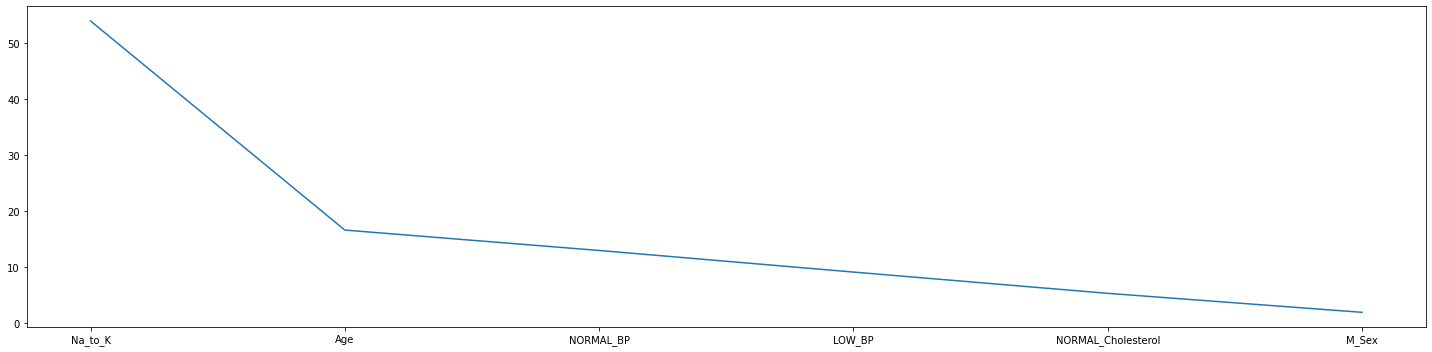

In [57]:
plt.figure(figsize=(20,5))
plt.plot(important_features)
plt.tight_layout()

### From above graph of feature importance,Sex feature has less importance
### Hence excluding the same.

In [58]:
# We can seee F_Sex is least importance , hence we can drop the same
X_train_F2 =   X_train_Features[['Age','Na_to_K', 'LOW_BP','NORMAL_BP','NORMAL_Cholesterol']] #
# We can seee F_Sex is least importance , hence we can drop the same
X_test_F2 =    X_test_Features[['Age','Na_to_K', 'LOW_BP','NORMAL_BP','NORMAL_Cholesterol']] #

X_Prod_F2 =  X_Prod_Features[['Age','Na_to_K', 'LOW_BP','NORMAL_BP','NORMAL_Cholesterol']] #

In [59]:
print("Test Dataset shape")
print(X_test_F2.shape,y_test.shape)
print("Train Dataset shape")
print(X_train_F2.shape,y_train.shape)

print("Prod Dataset shape")
print(X_Prod_F2.shape)

Test Dataset shape
(53, 5) (53, 1)
Train Dataset shape
(107, 5) (107, 1)
Prod Dataset shape
(40, 5)


## 4.4.0 RF Model With GridSearch

In [60]:
GS = {
    "criterion": ["gini", "entropy"],
    "n_estimators": np.arange(0,50)
}

rf = RandomForestClassifier()
rf_GS = GridSearchCV(rf, GS, cv=5)
rf_GS.fit(X_train_F2, y_train)
 


#print("Test Score: " + str(rf_GS.score(X_test, y_test)))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [61]:
print("HP: " + str(rf_GS.best_params_))
print("Train Score: " + str(rf_GS.best_score_))

HP: {'criterion': 'gini', 'n_estimators': 11}
Train Score: 0.9818181818181818


In [62]:
y_test.head()

,Drug_LABEL_ENCODE
105,0
108,1
141,1
55,1
94,0


In [63]:
print("HP: " + str(rf_GS.best_params_))

HP: {'criterion': 'gini', 'n_estimators': 11}


In [64]:
y_pred_train_RFGS = pd.DataFrame(rf_GS.predict(X_train_F2),columns=['Drug_LABEL_ENCODE'])
y_pred_test_RFGS = pd.DataFrame(rf_GS.predict(X_test_F2),columns=['Drug_LABEL_ENCODE'])


In [65]:
labels_target = list(labelencoder_target) #.classes_
print(labels_target)

confusion_matrix_RF_GSCV = pd.DataFrame(confusion_matrix(y_test, y_pred_test_RFGS),\
                                            columns=labels_target,index=labels_target)
display(confusion_matrix_RF_GSCV)

['drugX', 'DrugY', 'drugC', 'drugA', 'drugB']


,drugX,DrugY,drugC,drugA,drugB
drugX,15,0,0,0,0
DrugY,0,26,0,0,0
drugC,0,0,4,0,0
drugA,0,0,0,3,0
drugB,0,0,0,0,5


In [66]:
print('Accuracy Score for train with RF GridSearch CV Algo :  ' , rf_GS.best_score_) #   accuracy_score(y_train,y_pred_train_RFGS))
print('Accuracy score for test data with RF GridSearch is:', accuracy_score(y_test,y_pred_test_RFGS))
#print('F1 Score for train with RF GridSearch CV Algo :  ' , f1_score(y_train,y_pred_train_RFGS,average='weighted'))
#print('F1 score for test data with RF GridSearch is:', f1_score(y_test,y_pred_test_RFGS,average='weighted'))

Accuracy Score for train with RF GridSearch CV Algo :   0.9818181818181818
Accuracy score for test data with RF GridSearch is: 1.0


In [67]:
acc_train_RFGridCV = rf_GS.best_score_ # accuracy_score(y_train,y_pred_train_RFGS)
acc_test_RFGridCV  = accuracy_score(y_test,y_pred_test_RFGS)
print(acc_train_RFGridCV,acc_test_RFGridCV)

lst_AccRFGridCV =  [acc_train_RFGridCV,acc_test_RFGridCV]
lst_AccRFGridCV_indx =["RF Grid CV Train ","RF Grid CV Test "]
print(lst_AccRFGridCV)

f1_train_RFGridCV = f1_score(y_train,y_pred_train_RFGS,average='weighted')
f1_test_RFGridCV  =  f1_score(y_test,y_pred_test_RFGS,average='weighted')

0.9818181818181818 1.0
[0.9818181818181818, 1.0]


In [68]:
pd_plt_RFGS = pd.DataFrame(lst_AccRFGridCV,columns=["score"],index=lst_AccRFGridCV_indx)
display(pd_plt_RFGS)

import random


,score
RF Grid CV Train,0.98182
RF Grid CV Test,1.00000


## 4.4 Random Forest with RandomizedsearchCV**

In [69]:
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,7),\
              "min_samples_split": sp_randint(1, 10),\
              "min_samples_leaf": sp_randint(1, 5),\
              "bootstrap": [True, False],\
              "n_estimators": list(range(1,25,1)),\
              "criterion" : ["gini", "entropy"],\
              'max_features': ['sqrt', 'log2', None]\
             }
# run randomized search
n_iter_search = 30
# [4, , 700, 1000, 1500],

In [70]:

model = RandomForestClassifier(random_state = 42)
n_iter_search = 5
random_search = RandomizedSearchCV(model, param_distributions = param_dist,\
                                   n_iter = n_iter_search,cv=5,\
                                   n_jobs = -1)

In [71]:
# random_search.fit(X_train_OS, y_train_OS)
random_search.fit(X_train_F2, y_train)

print("Train Score: " + str(random_search.best_score_))

Train Score: 0.9727272727272727


In [72]:
print("best parameters: " + str(random_search.best_params_))

best parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 2}


In [73]:
y_pred_train_RandSearchCV = random_search.predict(X_train_F2)
y_pred_test_RandSearchCV = random_search.predict(X_test_F2)

In [74]:
confusion_matrix_RandSearchCV = pd.DataFrame(confusion_matrix(y_test, y_pred_test_RandSearchCV),\
                                            columns=labels_target,index=labels_target)
display(confusion_matrix_RandSearchCV)

,drugX,DrugY,drugC,drugA,drugB
drugX,15,0,0,0,0
DrugY,0,26,0,0,0
drugC,0,0,4,0,0
drugA,0,0,0,3,0
drugB,0,0,0,0,5


In [75]:
print('Accuracy Score for train with RandomisedSearch CV Algo :  ' ,random_search.best_score_ ) # accuracy_score(y_train,y_pred_train_RandSearchCV))
print('Accuracy score for test data with RandomisedSearch is:', accuracy_score(y_test,y_pred_test_RandSearchCV))
#print('F1 Score for train with RandomisedSearch CV Algo :  ' , f1_score(y_train,y_pred_train_RandSearchCV,average='weighted'))
#print('F1 score for test data with RandomisedSearch is:', f1_score(y_test,y_pred_test_RandSearchCV,average='weighted'))

Accuracy Score for train with RandomisedSearch CV Algo :   0.9727272727272727
Accuracy score for test data with RandomisedSearch is: 1.0


In [76]:
acc_train_RFRandCV = random_search.best_score_  # accuracy_score(y_train,y_pred_train_RandSearchCV)
acc_test_RFRandCV = accuracy_score(y_test,y_pred_test_RandSearchCV)
lst_AccRFEandCV =  [acc_train_RFRandCV,acc_test_RFRandCV]
lst_AccRFEandCV_indx =["RF Random CV Train ","RF Random CV Test "]
f1_train_RFRandCV = f1_score(y_train,y_pred_train_RandSearchCV,average='weighted')
f1_test_RFRandCV =  f1_score(y_test,y_pred_test_RandSearchCV,average='weighted')

In [77]:
pd_plt = pd.DataFrame(lst_AccRFEandCV,columns=["score"],index=lst_AccRFEandCV_indx)
display(pd_plt)
display(pd_plt_RFGS)

,score
RF Random CV Train,0.97273
RF Random CV Test,1.00000


,score
RF Grid CV Train,0.98182
RF Grid CV Test,1.00000


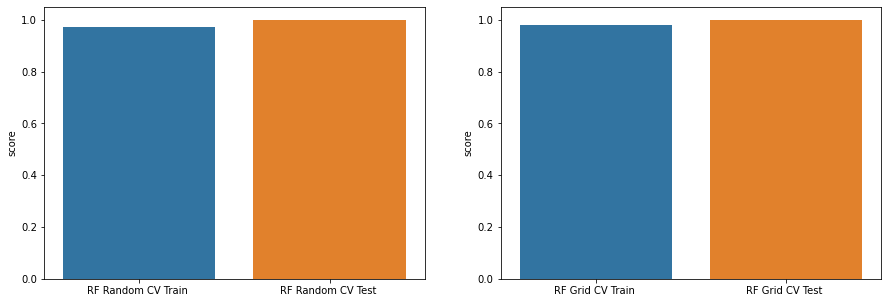

In [78]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x=pd_plt.index,y=pd_plt["score"])

plt.subplot(1,2,2)
sns.barplot(x=pd_plt_RFGS.index,y=pd_plt_RFGS["score"])
plt.show()

In [79]:
y_submit = rf_GS.predict(X_Prod_F2) # random_search

In [80]:
X_Prod_F2.shape
df_drug_prod.shape

(40, 7)

In [81]:
y_submit.shape

(40,)

In [82]:
#df_y_submit = pd.DataFrame(y_submit)

In [83]:
#display(df_y_submit.head())
df_submit = pd.DataFrame(y_submit,columns=['Drug']) # labelencoder_target.inverse_transform(df_y_submit) 
display(df_drug_prod.head())
display(df_submit.head())

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_log
0,95,36,M,LOW,NORMAL,11.42400,2.43572
1,15,16,F,HIGH,NORMAL,15.51600,2.74187
2,30,18,F,NORMAL,NORMAL,8.75000,2.16905
3,158,59,F,LOW,HIGH,10.44400,2.34603
4,128,47,M,LOW,NORMAL,33.54200,3.51280


,Drug
0,0
1,1
2,0
3,2
4,1


In [84]:
#Merge with test dataset to get Id column from test set 
df_submit_final = df_submit.merge(df_drug_prod,how='inner',left_index=True,right_index=True)[['Id','Drug']]
display(df_submit_final.head())

,Id,Drug
0,95,0
1,15,1
2,30,0
3,158,2
4,128,1


In [85]:
print(df_submit_final.shape)
if df_submit_final.shape[0]==40 and df_submit_final.shape[1]==2:
    df_submit_final.to_csv('submission.csv', index=False, header=False)
    print("File exported successfully")
else:
    print("Issue in export please check submit result datafrane")

(40, 2)
File exported successfully


<a id=section8></a>
## Conclusion

 - We studied **in-depth** about the various **features** in the data, their **characteristics** and their **distributions**.

- We went through an **extensive** and **thorough** data analysis process, exploring various relationships between the different **features**.

- We **encoded** the *categorical data* and **removed** any *redundant columns* to make our dataset fit for training.

- We tested different models, performed **cross-validation** on them, and compared their performance.

- We selected the **best hyperparameter combination** model found using Grid Search as our **final model**, and made **predictions** on the test set using it.